# IMPORTING THE LIBRARIES

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

# IMPORTING THE DATASET

In [4]:
data=pd.read_csv('Crude_Oil_Prices_Daily.csv')

In [5]:
print(data)

            Date  Closing Value
0     02-01-1986          25.56
1     03-01-1986          26.00
2     06-01-1986          26.53
3     07-01-1986          25.85
4     08-01-1986          25.87
...          ...            ...
8218  03-07-2018          74.19
8219  04-07-2018            NaN
8220  05-07-2018          73.05
8221  06-07-2018          73.78
8222  09-07-2018          73.93

[8223 rows x 2 columns]


# HANDLING MISSING DATA

In [6]:
data.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [7]:
data.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [8]:
data.dropna(axis=0,inplace=True)

In [9]:
data.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [10]:
data_oil=data.reset_index()['Closing Value']

In [11]:
data_oil

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

# FEATURE SCALING

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_oil=scaler.fit_transform(np.array(data_oil).reshape(-1,1))

In [13]:
data_oil

array([[0.11335703],
       [0.11661484],
       [0.12053902],
       ...,
       [0.46497853],
       [0.47038353],
       [0.47149415]])

# DATA VISUALIZATION

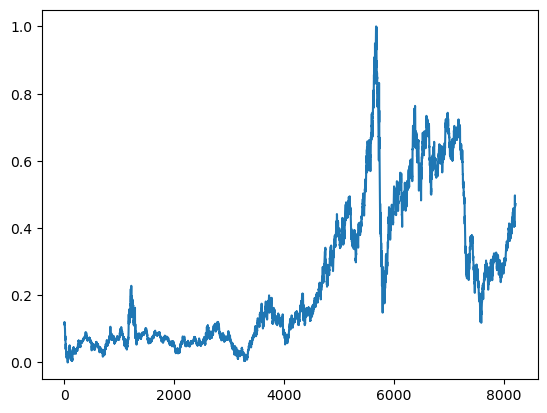

In [14]:
plt.plot(data_oil)

# SPLITTING DATA INTO TRAINING AND TEST

In [15]:
training_size=int(len(data_oil)*0.65)
test_size=len(data_oil)-training_size
train_data,test_data=data_oil[0:training_size,:],data_oil[training_size:len(data_oil),:1]

In [16]:
training_size,test_size

(5340, 2876)

In [17]:
train_data.shape

(5340, 1)

# CREATING THE DATASET

In [18]:
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [19]:
time_step=10
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [20]:
print(x_train.shape),print(y_train.shape)

(5329, 10)
(5329,)


(None, None)

In [21]:
print(x_test.shape),print(y_test.shape)

(2865, 10)
(2865,)


(None, None)

In [22]:
x_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [23]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

# IMPORTING THE MODEL BUILDING LIBRARIES

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [28]:
pip install tensorflow


     ------------------------------------ 455.9/455.9 MB 554.0 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.2 MB/s eta 0:00:00
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached flatbuffers-22.10.26-py2.py3-none-any.whl (26 kB)
     ------------------------------------ 895.9/895.9 kB 644.1 kB/s eta 0:00:00
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
     ---------------------------------------- 3.7/3.7 MB 659.2 kB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached termcolor-2.1.0-py3-none-any.whl (5.8 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached

# INITIALIZING THE MODEL

In [25]:
model=Sequential()

# ADDING LSTM LAYERS

In [26]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

# ADDING OUTPUT LAYERS

In [27]:
model.add(Dense(1))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


# CONFIGURING THE LEARNING PROCESS

In [29]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [30]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3,batch_size=64,verbose=1)

Epoch 1/3
84/84 [==============================] - 17s 79ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 2/3
84/84 [==============================] - 4s 42ms/step - loss: 1.2838e-04 - val_loss: 7.5309e-04
Epoch 3/3
84/84 [==============================] - 4s 49ms/step - loss: 1.2288e-04 - val_loss: 0.0010


# MODEL EVALUATION

In [31]:
train_predict=scaler.inverse_transform(train_data) 
test_predict=scaler.inverse_transform(test_data)
### Calculate RMSE performance metrics
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_data,train_predict))

29.347830443269938

# SAVING THE MODEL

In [32]:
from tensorflow.keras.models import load_model

In [33]:
model.save("crude_oil.h5")

# TESTING THE MODEL

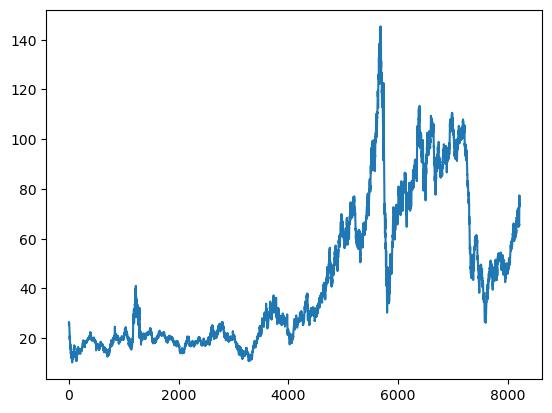

In [34]:
look_back=10
trainpredictPlot = np.empty_like(data_oil)
trainpredictPlot[:, :]= np.nan
trainpredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictplot = np.empty_like(data_oil)
testPredictplot[:,: ] = np.nan
testPredictplot[look_back:len(test_predict)+look_back, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data_oil))
plt.show()

In [35]:
x_input=test_data[2866:].reshape(1,-1)
x_input.shape

(1, 10)

In [36]:
temp_input=list(x_input) 
temp_input=temp_input[0].tolist()

In [37]:
temp_input

[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [38]:
lst_output=[]
n_steps=10
i=0
while(i<10):
    if(len(temp_input)>10):
#print(temp_input)
       x_input=np.array(temp_input[1:]) 
       print("{} day input {}".format(i,x_input))
       x_input=x_input.reshape(1,-1)
       x_input = x_input.reshape((1, n_steps, 1)) #print(x_input)
       yhat = model.predict(x_input, verbose=0)
       print("{} day output {}".format(i,yhat))
       temp_input.extend(yhat[0].tolist())
       temp_input=temp_input[1:] #print(temp_input)
       lst_output.extend(yhat.tolist())
       i=i+1
    else:
       x_input = x_input.reshape((1, n_steps,1))
       yhat = model.predict(x_input, verbose=0)
       print(yhat[0])
       temp_input.extend(yhat[0].tolist()) 
       print(len(temp_input))
       lst_output.extend(yhat.tolist())
       i=i+1

[0.4926017]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.49260169]
1 day output [[0.49664572]]
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.49260169 0.49664572]
2 day output [[0.4960615]]
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.49260169 0.49664572 0.4960615 ]
3 day output [[0.49419552]]
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.49260169 0.49664572 0.4960615  0.49419552]
4 day output [[0.49680844]]
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.49260169
 0.49664572 0.4960615  0.49419552 0.49680844]
5 day output [[0.4993086]]
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.49260169 0.49664572
 0.4960615  0.49419552 0.49680844 0.49930859]
6 day output [[0.5025015]]
7 day input [0.46497853 0.47038353 0.47149415 0.49260169 0.49664572 0.

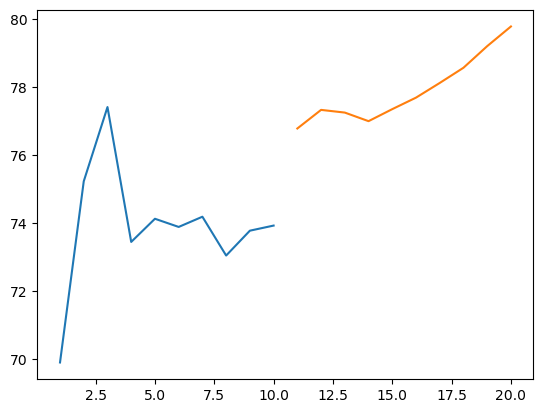

In [39]:
day_new=np.arange(1,11) 
day_pred=np.arange(11,21)
len(data_oil)
plt.plot(day_new, scaler.inverse_transform(data_oil[8206:])) 
plt.plot(day_pred, scaler.inverse_transform(lst_output))

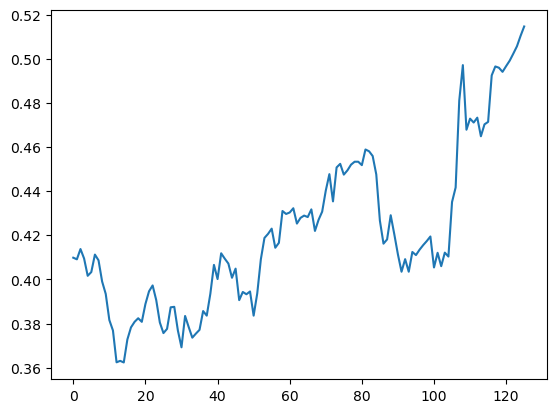

In [40]:
df3=data_oil.tolist() 
df3.extend(lst_output) 
plt.plot(df3[8100:])

In [41]:
df3=scaler.inverse_transform(df3).tolist()

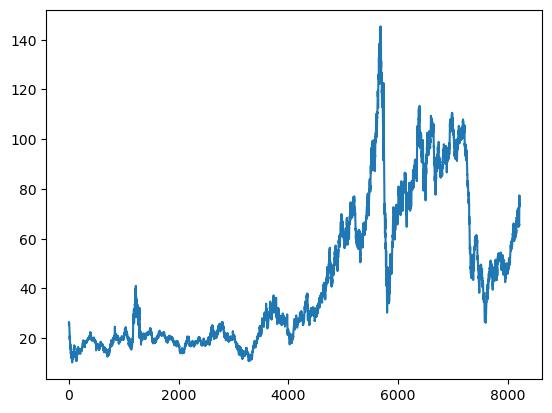

In [42]:
plt.plot(scaler.inverse_transform(data_oil))

In [43]:
!pip install watson-machine-learning-client

     ------------------------------------ 538.9/538.9 kB 266.5 kB/s eta 0:00:00
     -------------------------------------- 55.6/55.6 kB 181.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 956.8/956.8 kB 383.4 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 135.7/135.7 kB 473.3 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.12.0-py3-none-any.whl size=73910 sha256=a08bfe47d0b74a9fac86adb6117a5636e498ad8f2a53f7f8343dac8ab7357237
  Stored in directory: c:\users\renuga devi\appdata\local\pip\cache\wheels\31\8c\e6\9bd830e254449a64d3e3c8a79da6fb6bc940a19b165d76c3c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.12.0-py3-non

In [44]:
!pip install ibm_watson_machine_learning

     ---------------------------------------- 1.8/1.8 MB 309.0 kB/s eta 0:00:00
     -------------------------------------- 53.3/53.3 kB 172.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ------------------------------------ 913.9/913.9 kB 751.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 135.6/135.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.11.0-py3-none-any.whl size=73641 sha256=c42b3e63f16ddcbe08dc170f8aa78fd04fe2a3fd228b7aca18743af9efe11b5a
  Stored in directory: c:\users\renuga devi\appdata\local\pip\cache\wheels\d3\a5\34\52d2e378d3d0446989ebcd214af8bad55beecf905258852b9f
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.11.0-py3-non